<a href="https://colab.research.google.com/github/maciejlehmann/175IC-machine-learning/blob/main/Zad_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_iris


sns.set(font_scale=1.3)
np.random.seed(42)


raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

df = pd.DataFrame(data=np.c_[data, target], columns=feature_names + ['target'])

data = data[:, [0,1]]
target = df['target'].apply(int).values

print(f'{data[:5]}\n')
print(f'{target[:5]}\n')

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

[0 0 0 0 0]



In [9]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)

classifier.fit(data, target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



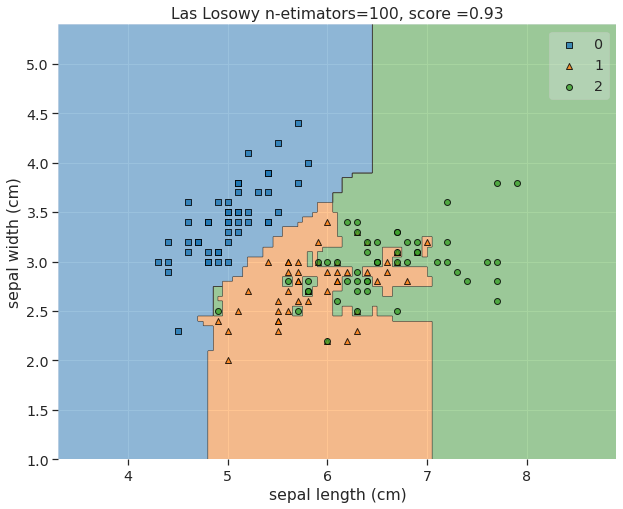

In [10]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 8))
plot_decision_regions(data, target, classifier)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title(f'Las Losowy n-etimators=100, score ={np.round(classifier.score(data, target),2)}')
plt.show()

Dokładność = 0.9500

petal length (cm)    0.559692
petal width (cm)     0.316905
sepal length (cm)    0.104898
sepal width (cm)     0.018505
dtype: float64





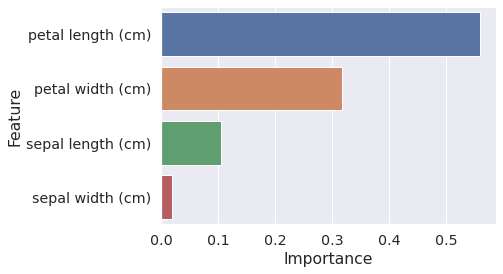

In [42]:
df = pd.DataFrame(data=np.c_[data, target], columns=feature_names + ['target'])
X = data[:]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) 

classifier = RandomForestClassifier(n_estimators=100)

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Dokładność = {accuracy:.4f}\n')

feature_imp = pd.Series(classifier.feature_importances_, index=feature_names).sort_values(ascending=False)
print(feature_imp)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
print('\n\n')
plt.show()